In [53]:
#imports
import os
import pandas as pd
import yahoo_finance
from yahoo_quote_download import yqd

import matplotlib.pyplot as plt

In [94]:
def symbol_to_path(symbol, base_dir="../data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

# bummer yahoo discontinued this service, needs crumb now.
def symbol_to_url(symbol, start, end):
    get_symbol = yahoo_finance.Share(symbol)
    #print (get_symbol.get_open())
    symbol_data = get_symbol.get_historical(start, end)
    return symbol_data

def symbol_to_ypq(ticker, start, end):
    data = yqd.load_yahoo_quote(ticker, start, end)
    outfile = open(symbol_to_path(ticker), "w")
    outfile.write('\n'.join(data))
    outfile.close()
    return symbol_to_path(ticker)
    
def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    
    ax = df.plot(title=title, fontsize=12, figsize=(10,10))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


In [78]:
symbol = 'AAPL'
start = '2016-11-11'
end = '2017-11-10'
dates = pd.date_range(start, end)


In [79]:
## Debugging purpose only
x = symbol_to_ypq(symbol, start.replace('-',''), end.replace('-',''))
df = pd.DataFrame(x)
print(df.head(5))

                                                   0
0          Date,Open,High,Low,Close,Adj Close,Volume
1  2016-11-11,107.120003,108.870003,106.550003,10...
2  2016-11-14,107.709999,107.809998,104.080002,10...
3  2016-11-15,106.570000,107.680000,106.160004,10...
4  2016-11-16,106.699997,110.230003,106.599998,10...


In [81]:
df = pd.DataFrame(index=dates)

# discontinued
#df_temp = pd.read_csv(symbol_to_url(symbol, start, end), index_col='Date',

#df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
df_temp = pd.read_csv(symbol_to_ypq(symbol, start.replace('-',''), end.replace('-','')), index_col='Date',
            parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
df_temp = df_temp.rename(columns={'Adj Close': symbol})
df = df.join(df_temp)
df = df.dropna(subset=[symbol])
# TODO: Print last 5 rows of the data frame
print( df.tail(5))       

                  AAPL
2017-11-06  173.625839
2017-11-07  174.183823
2017-11-08  175.608719
2017-11-09  175.250000
2017-11-10  174.669998


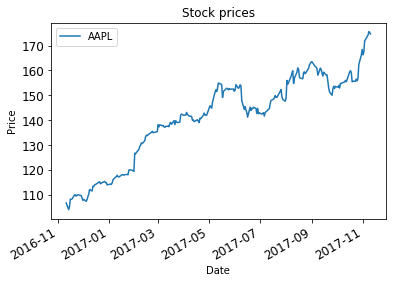

In [82]:
#plot data
%matplotlib inline
plot_data(df)

In [83]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)

#new method with new API version
def df_rolling_mean(df, window):
    """Return rolling mean of given values, using specified window size."""
    return df.rolling(window).mean()

def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return pd.rolling_std(values, window=window)

#new method with new API version
def df_rolling_std(df, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return df.rolling(window).std()

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + (2*rstd)
    lower_band = rm - (2*rstd)
    return upper_band, lower_band

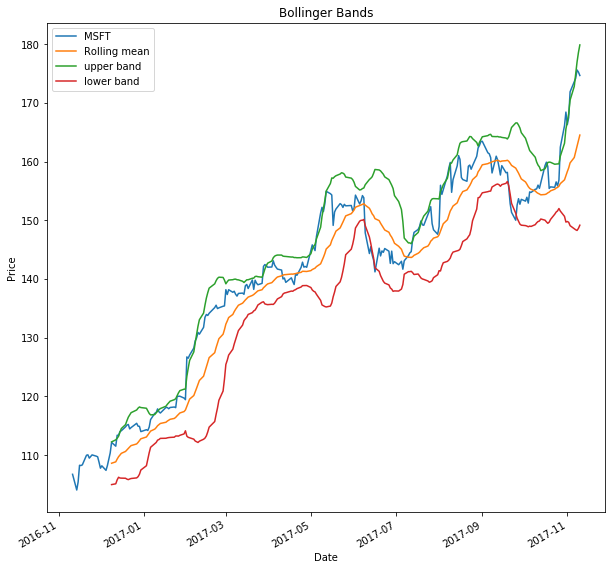

In [89]:
# Compute Bollinger Bands
# 1. Compute rolling mean
#rm_MSFT = get_rolling_mean(df['MSFT'], window=20)
rm_MSFT = df_rolling_mean(df[symbol], window=20)

# 2. Compute rolling standard deviation
#rstd_MSFT = get_rolling_std(df['MSFT'], window=20)
rstd_MSFT = df_rolling_std(df[symbol], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_MSFT, rstd_MSFT)
    
# Plot raw SPY values, rolling mean and Bollinger Bands
plt.figure(figsize=(10,10))
ax = df[symbol].plot(title="Bollinger Bands", label='MSFT')
rm_MSFT.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

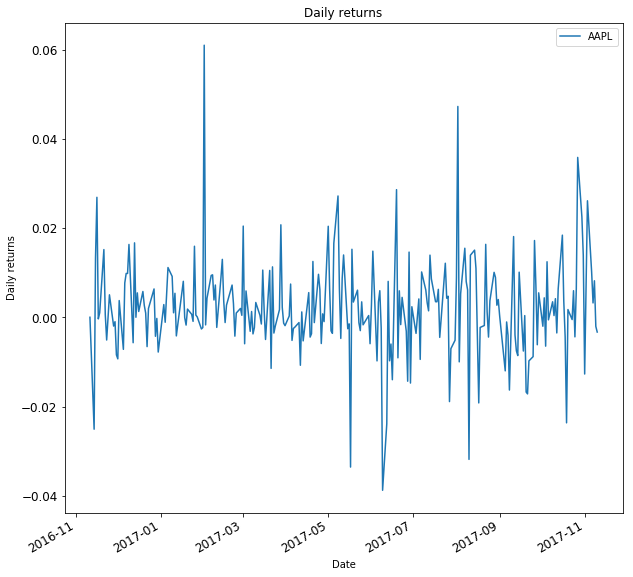

In [95]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:]/df[:-1].values) - 1
    #daily_returns.ix[0,:] = 0
    daily_returns.iloc[0,:] = 0
    return daily_returns

# Compute daily returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
